<a href="https://colab.research.google.com/github/phnx4um/logistic_reg/blob/master/simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider a two-class dataset with two dimensional features. The dataset contains the
following data:

Class 1: (15, 10), (13, 6), (14,8), (12, 9), (10, 7), (12, 6), (11, 8), (13, 10), (10, 6).

Class 2: (8, 12), (6, 11), (8, 14), (9, 14), (10, 15), (9, 12), (7, 10), (8, 13).

Apply ANN to train the data to classify. Apply leave-one-out mechanism to test your
classifier.

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data = [[15, 10, 0], [13, 6, 0], [14,8, 0], [12, 9, 0], [10, 7, 0],  [12, 6, 0], [11, 8, 0], [13, 10, 0], [10, 6, 0], 
        [8, 12, 1],  [6, 11, 1], [8, 14,1], [9, 14, 1], [10, 15, 1], [9, 12, 1], [7, 10, 1], [8, 13, 1]]

In [4]:
print(data)

[[15, 10, 0], [13, 6, 0], [14, 8, 0], [12, 9, 0], [10, 7, 0], [12, 6, 0], [11, 8, 0], [13, 10, 0], [10, 6, 0], [8, 12, 1], [6, 11, 1], [8, 14, 1], [9, 14, 1], [10, 15, 1], [9, 12, 1], [7, 10, 1], [8, 13, 1]]


In [5]:
random.seed(0)
random.shuffle(data)

[[14, 8, 0], [9, 12, 1], [12, 9, 0], [8, 13, 1], [6, 11, 1], [13, 6, 0], [8, 12, 1], [12, 6, 0], [8, 14, 1], [7, 10, 1], [11, 8, 0], [13, 10, 0], [10, 6, 0], [10, 7, 0], [15, 10, 0], [10, 15, 1], [9, 14, 1]]
17


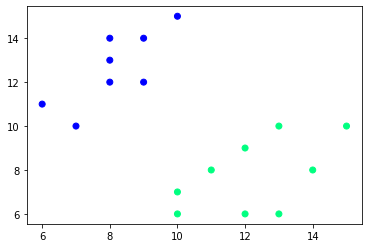

In [8]:
print(data)
print(len(data))

x = [p[0] for p in data]
y = [p[1] for p in data]
l = [p[-1] for p in data]


plt.scatter(x,y,c=l, cmap=plt.cm.winter_r)
plt.show()

  

In [13]:
def sigmoid(x):
  return 1/(1 + np.exp(-x)) 

In [14]:
def err(point, y , W, B):
  w0 = W[0][0]
  w1 =  W[1][0]
  b = B

  x0 = point[0]
  x1 = point[1]
  y = y

  z = (w0 * x0) + (w1 * x1) + b
  a = sigmoid(z) 

  loss = -((y * np.log(a)) + ((1 - y) * np.log(1 - a)))
  return loss

In [15]:
input = [ point[0:2] for point in data ]
output = [point[-1] for point in data]
print(input)
print(output)

[[14, 8], [9, 12], [12, 9], [8, 13], [6, 11], [13, 6], [8, 12], [12, 6], [8, 14], [7, 10], [11, 8], [13, 10], [10, 6], [10, 7], [15, 10], [10, 15], [9, 14]]
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]


In [20]:
# ADD loocv
total_err = []
for i in range(len(input)):
  print(f'==========  Model {i} ==========')

  loocv_input = input[:i] + input[i+1:]
  loocv_output = output[:i] + output[i+1:]

  validate_input = input[i]
  validate_output = output[i]

  X = np.array(loocv_input)
  X = X.T

  y = np.array(loocv_output)
  y = y.reshape(1, len(y))

  W = np.array([-0.1,0.1]).reshape(2,1)
  B = 0.1
  a = 0.002

  # training 
  epochs = 50000
  for i in range(epochs): 
    dw = np.array([0,0]).reshape(2,1)
    db = 0

    Z = np.dot(W.T, X) + B

    A = 1/(1 + np.exp(-Z))

    dZ = A - y

    dw = 1/X.shape[1] * (np.dot(X, dZ.T))
    db = 1/X.shape[1] * np.sum(dZ)

    W = W - (a * dw)
    B = B - (a * db) 

  print('Weights')
  print(W)
  print('Bias')
  print(B)
  print()

  total_err.append(err(validate_input, validate_output, W, B))

print(f'Error for each individual {len(total_err)} models')
print(total_err)
loocv_err = sum(total_err)/len(total_err)
print('Final average LOOCV error:')
print(loocv_err)

==========  Model 0 ==========
Weights
[[-1.78127337]
 [ 1.73927567]]
Bias
0.09503891783296413

==========  Model 1 ==========
Weights
[[-1.72934249]
 [ 1.65218396]]
Bias
0.10496354952053581

==========  Model 2 ==========
Weights
[[-1.73776458]
 [ 1.71075633]]
Bias
0.09140402201491313

==========  Model 3 ==========
Weights
[[-1.77714254]
 [ 1.73416366]]
Bias
0.09683078529998765

==========  Model 4 ==========
Weights
[[-1.77719673]
 [ 1.73494859]]
Bias
0.091524561821118

==========  Model 5 ==========
Weights
[[-1.78206232]
 [ 1.7398471 ]]
Bias
0.09658332105092272

==========  Model 6 ==========
Weights
[[-1.76572454]
 [ 1.71948717]]
Bias
0.0951579396379196

==========  Model 7 ==========
Weights
[[-1.78132225]
 [ 1.73907521]]
Bias
0.097438073278048

==========  Model 8 ==========
Weights
[[-1.78068921]
 [ 1.73827658]]
Bias
0.09714684987109615

==========  Model 9 ==========
Weights
[[-1.72987554]
 [ 1.66896813]]
Bias
0.06793142626074718

==========  Model 10 ==========
Weights
[[-1.

# PREDICTIONS
(with Weights and bias from the last LOOCV model)

In [22]:
def predict(point, W, B):
  w0 = W[0][0]
  w1 =  W[1][0]
  b = B

  x0 = point[0]
  x1 = point[1]
  y = point[-1]

  z = (w0 * x0) + (w1 * x1) + b
  a = sigmoid(z) 

  if (a > 0.5):
    pre = 1
  else: 
    pre = 0

  output = 'incorrect'
  if y == pre:
    output = 'correct'
  
  print(y , pre, output) 

In [23]:
# predictions
print('Target', 'Prediction', 'isCorrect')
for point in data:
  predict(point, W, B)

Target Prediction isCorrect
0 0 correct
1 1 correct
0 0 correct
1 1 correct
1 1 correct
0 0 correct
1 1 correct
0 0 correct
1 1 correct
1 1 correct
0 0 correct
0 0 correct
0 0 correct
0 0 correct
0 0 correct
1 1 correct
1 1 correct


# Error Calculations for all points

In [ ]:
# error values
output = []
for point in data:
  output.append(err(point, W, B))

for result in output:
  print(result)

0.004117747427420111
0.0012960468373146583
0.003948560875223476
0.006934243849589541
2.1649636220233932e-05
4.141624901536757e-05
1.9903787348126992e-05
0.00754019590854437
0.0037863125656506704
3.7096733279676963e-06
0.0002130489681525634
0.0002416830016492275
0.0002520585784985866
0.00023173446887292683
0.003630719022882951
0.000737111005833924
0.0001067875021923253
